## Часть 5.
---
В данной части происходит магия. На основе данных, которые мы получили на 3 этапе мы обучаем нейросеть.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1550 non-null   object 
 1   latitude                    1550 non-null   float64
 2   longitude                   1550 non-null   float64
 3   price_sqm                   1550 non-null   int64  
 4   change_last_q               1550 non-null   object 
 5   change_last_y               1550 non-null   object 
 6   rental_yield                1550 non-null   float64
 7   change_last_y_rental_price  1550 non-null   object 
 8   price_hist                  1550 non-null   object 
 9   district_cor                1550 non-null   object 
 10  year_built_imp_med          1550 non-null   int64  
 11  buildings_cor               1550 non-null   int64  
 12  floors_cor_imp_med          1550 non-null   int64  
 13  units_cor_imp_med           1550 

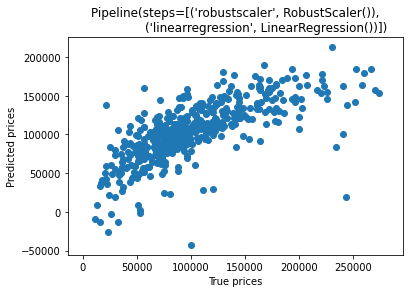

RMSE test: 36418.04 r2_score test: 0.5056552322775255


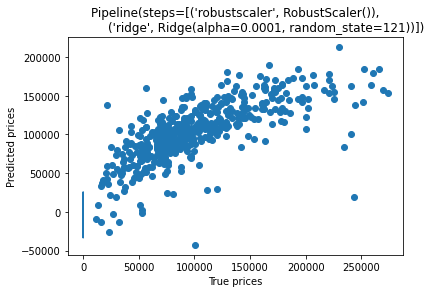

RMSE test: 36418.04 r2_score test: 0.5056554986886532


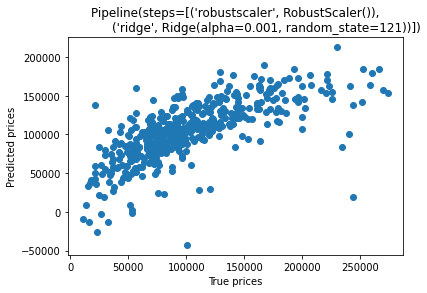

RMSE test: 36417.95 r2_score test: 0.5056578947375542


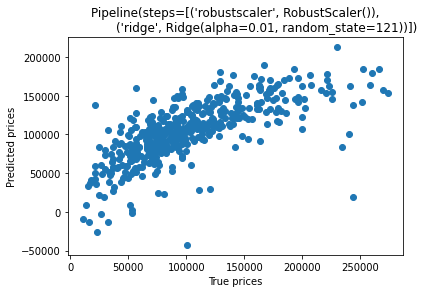

RMSE test: 36417.07 r2_score test: 0.5056816927610259


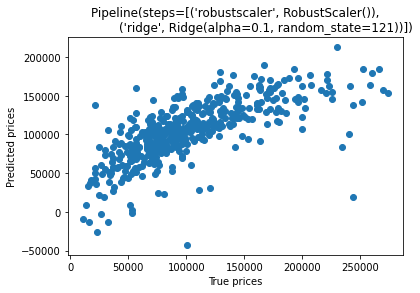

RMSE test: 36408.87 r2_score test: 0.505904375084538


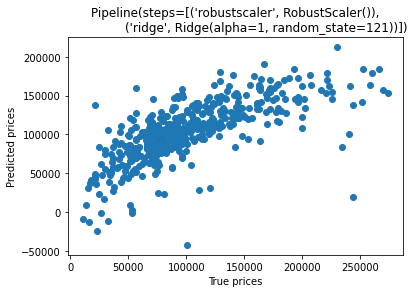

RMSE test: 36361.52 r2_score test: 0.507188524838547


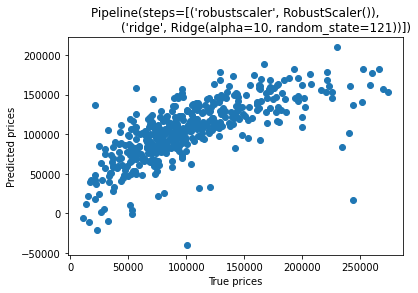

RMSE test: 36350.14 r2_score test: 0.5074969823710151


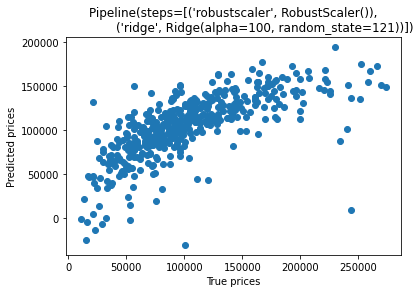

RMSE test: 36662.94 r2_score test: 0.4989843293557179


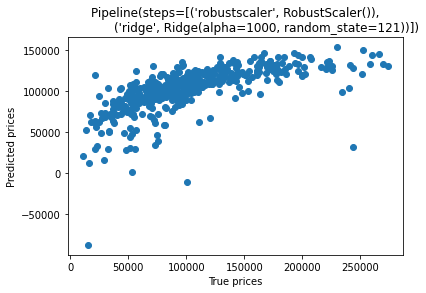

RMSE test: 39708.62 r2_score test: 0.4122856576396434


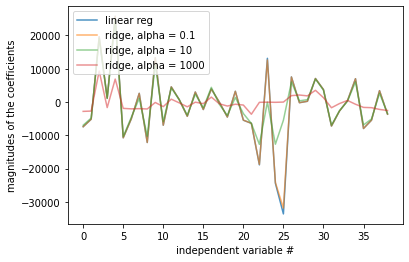

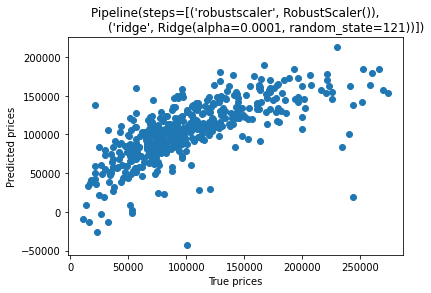

RMSE test: 36418.04 r2_score test: 0.5056554986886532
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=80, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=80, max_features=9, min_samples_leaf=3, min_sampl

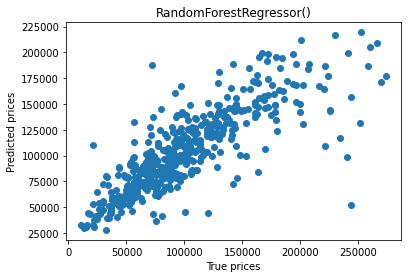

RMSE test: 30450.87 r2_score test: 0.6543822032680188
RMSE test: 30450.87 r2_score test: 0.6543822032680188


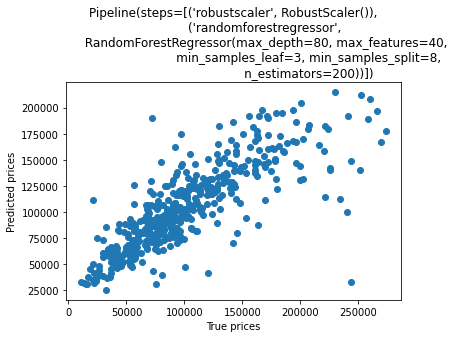

RMSE test: 30972.28 r2_score test: 0.6424448481789765
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END learning_rate=0.05, loss=huber, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, random_state=121; total time=   3.9s
[CV] END learning_rate=0.05, loss=huber, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, random_state=121; total time=   3.9s
[CV] END learning_rate=0.05, loss=huber, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, random_state=121; total time=   3.9s
[CV] END learning_rate=0.05, loss=huber, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, random_state=121; total time=   3.9s
[CV] END learning_rate=0.05, loss=huber, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, random_state=121; total time=   4.0s
[CV] END learning_rate=0.05, loss

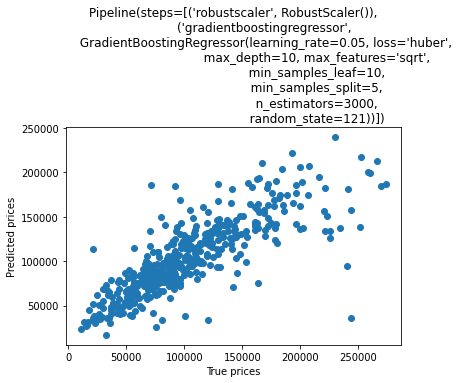

RMSE test: 30033.24 r2_score test: 0.6637973026043756
RMSE test: 30033.24 r2_score test: 0.6637973026043756


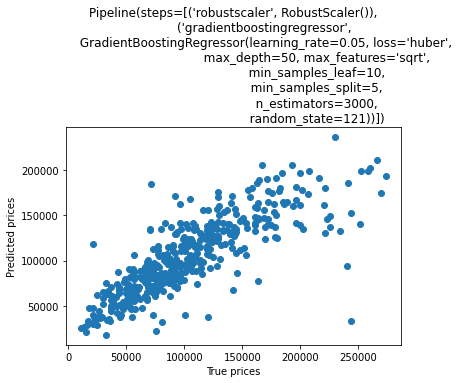

RMSE test: 29937.48 r2_score test: 0.6659379297586393


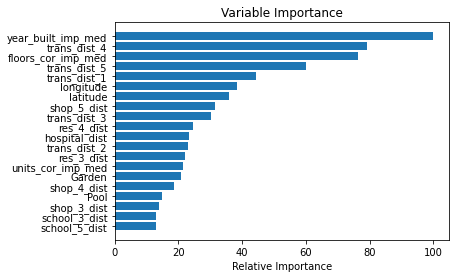

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict, validation_curve
from sklearn import metrics
from sklearn.metrics import make_scorer,mean_squared_error, r2_score

df=pd.read_csv("data_cleaned.csv")
print(df.info())
print(df['district_cor'].nunique())
print(df['trans_type_1'].nunique())

df = df[np.abs(df["price_sqm"]-df["price_sqm"].mean())<=(3*df["price_sqm"].std())]

df = df.drop(columns=['name', 'district_cor','price_hist', 'change_last_q', 'change_last_y', 'change_last_y_rental_price','rental_yield', 'rental_yield', 'shop_1', 'shop_2', 'shop_3', 'shop_4', 'shop_5', 'school_1', 'school_2', 'school_3', 'school_4', 'school_5', 'res_1', 'res_2', 'res_3', 'res_4', 'res_5','trans_name_1','trans_type_1', 'trans_name_2','trans_type_2','trans_name_3','trans_type_3','trans_name_4','trans_type_4','trans_name_5','trans_type_5'])

print(df.info())
df['price_sqm'].describe()
plt.hist(df['price_sqm'])

corr_matrix = df.corr()
np.abs(corr_matrix["price_sqm"]).sort_values(ascending=False)

X = df.drop('price_sqm', axis=1)
y = df['price_sqm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 121)

def rmse_cv(model,n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state = 121)
    rmse_train= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    r2_train= cross_val_score(model, X_train, y_train, scoring="r2", cv = kf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    plt.scatter(y_test, y_pred)    
    plt.title(model)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")  
    plt.show()
    print('RMSE test: {:.2f}'.format(rmse_test),'r2_score test: '+ str(r2_test))
    return(rmse_train,r2_train,rmse_test, r2_test)
ols = make_pipeline(RobustScaler(), LinearRegression())
rmse_train,r2_train,rmse_test, r2_test = rmse_cv(ols)
ols.steps[1][1]
ols.steps[1][1].coef_
plt.plot(ols.steps[1][1].coef_)
ols_coef = pd.DataFrame(ols.steps[1][1].coef_,index = list(X_test),columns=['coef'])
###############################################################################
# ridge regression
# вручную подобранно
alpha_list =[0.0001,0.001,0.01,0.1,1,10,100,1000]
result=[]
for alpha_val in alpha_list:
    ridge = make_pipeline(RobustScaler(), Ridge(alpha= alpha_val, random_state = 121))
    rmse_train,r2_train,rmse_test, r2_test = rmse_cv(ridge)
    result.append([ridge,alpha_val,rmse_test,r2_test])
ridge_result = pd.DataFrame(result, columns = ['ridge_model','alpha_val','rmse_test','r2_test'])
ridge_result.to_csv('ridge_result.csv')
#plot to compare effect of alpha
plt.plot(ols.steps[1][1].coef_, alpha = .8)
plt.plot(ridge_result['ridge_model'][3].steps[1][1].coef_, alpha = 0.6)
plt.plot(ridge_result['ridge_model'][5].steps[1][1].coef_, alpha = 0.5)
plt.plot(ridge_result['ridge_model'][7].steps[1][1].coef_, alpha = 0.5)
plt.xlabel('independent variable #')
plt.ylabel('magnitudes of the coefficients')
plt.legend(['linear reg', 'ridge, alpha = 0.1', 'ridge, alpha = 10', 'ridge, alpha = 1000'], loc='upper left')
plt.show()
# get coefficient
ridge = make_pipeline(RobustScaler(), Ridge(alpha= 0.0001, random_state = 121))
rmse_train,r2_train,rmse_test, r2_test = rmse_cv(ridge)
ridge_coef = pd.DataFrame(ridge.steps[1][1].coef_,index = list(X_test),columns=['coef'])
ridge_coef.to_csv('ridge_coef.csv')
###############################################################################
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [9, 40],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# базовая модель
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
#Fitting 5 folds for each of 288 candidates, totalling 1440 fits
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
#[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.4s
#[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.9s
#[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
#[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.2min
#[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
#[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 11.4min finished
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
#{'bootstrap': True,
# 'max_depth': 80,
# 'max_features': 40,
# 'min_samples_leaf': 3,
# 'min_samples_split': 8,
# 'n_estimators': 200}
best_grid = grid_search.best_estimator_
# run the model using best params
rf_best = make_pipeline(RobustScaler(), best_grid)
rmse_train,r2_train,rmse_test, r2_test = rmse_cv(rf)
print('RMSE test: {:.2f}'.format(rmse_test),'r2_score test: '+ str(r2_test))

# запуск с лучшими параметрами
rf_best = make_pipeline(RobustScaler(), 
                        RandomForestRegressor(
                        bootstrap= True,
                        max_depth= 80,
                        max_features= 40,
                        min_samples_leaf= 3,
                        min_samples_split= 8,
                        n_estimators= 200))
rmse_train,r2_train,rmse_test, r2_test = rmse_cv(rf_best)
rf_best.steps[1][1].feature_importances_
rf_best_feature_importances_ = pd.DataFrame(rf_best.steps[1][1].feature_importances_,index = list(X_test),columns=['feature_importances_'])
rf_best_feature_importances_.to_csv('rf_best_feature_importances_.csv')
param_grid = {
    'learning_rate': [0.05],
    'max_depth': [10, 20, 50, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [100, 200, 300, 1000,3000],    
    'loss': ['huber'],
    'random_state': [121]   
}

GBoost = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search_GBoost = GridSearchCV(estimator = GBoost, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search_GBoost.fit(X_train, y_train)
grid_search_GBoost.best_params_
best_grid_search_GBoost = grid_search_GBoost.best_estimator_
GBoost_best = make_pipeline(RobustScaler(), best_grid_search_GBoost)
rmse_train,r2_train,rmse_test, r2_test = rmse_cv(GBoost_best)
print('RMSE test: {:.2f}'.format(rmse_test),'r2_score test: '+ str(r2_test))
GBoost_best = make_pipeline(RobustScaler(), 
                        GradientBoostingRegressor(
                        learning_rate= 0.05,
                        loss='huber',
                        max_depth= 50,
                        max_features= 'sqrt',
                        min_samples_leaf= 10,
                        min_samples_split= 5,
                        n_estimators= 3000,
                        random_state=121))
rmse_train,r2_train,rmse_test, r2_test = rmse_cv(GBoost_best)
GBoost_best.steps[1][1].feature_importances_
GBoost_best_feature_importances_ = pd.DataFrame(GBoost_best.steps[1][1].feature_importances_,index = list(X_test),columns=['feature_importances_'])
GBoost_best_feature_importances_.to_csv('GBoost_best_feature_importances_.csv')
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
feature_importance = GBoost_best.steps[1][1].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(-feature_importance)[:20]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx[::-1]], align='center')
plt.yticks(pos, [list(X_train)[i] for i in sorted_idx[::-1]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()